In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# 2. Read the CSV file

In [2]:
# read csv file
data = pd.read_csv('./data/FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# 3. Feature selection for regression model

In [7]:
# Select only fezatures from our dataset which we are going to use for predictions

data = data[["ENGINESIZE","CO2EMISSIONS"]]
data.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


# 4. Plotting the data points on a scatter plot

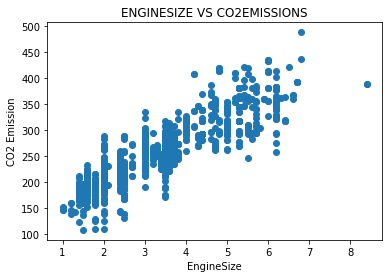

In [8]:
# Scatter Plot : #ENGINSIZE VS CO2EMISSIONS

plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"])
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("EngineSize")
plt.ylabel("CO2 Emission")
plt.show()

# 5. Dividing data into testing and training dataset

In [9]:
# Splitting 80% for the training and 20% for the testing

num = int(len(data)*0.8)

# training data
train = data[:num]

# testing data
test = data[num:]

print("Data : ", len(data))
print("Train : ", len(train))
print("Test : ", len(test))

Data :  1067
Train :  853
Test :  214


# 6. Training the model

In [11]:
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

coefficients = regr.coef_
intercept = regr.intercept_

# Slope
print("Slope : ", coefficients[0])

# Intercept
print("Intercept : ", intercept)

Slope :  [38.79512384]
Intercept :  [127.16989951]


# 7. Predicting values for a complete dataset

In [12]:
# predtcing the values for the whole dataset

predicted_data = regr.predict(data[["ENGINESIZE"]])
predicted_data[0:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

# 8. Predicting values for the training data

In [17]:
predicted_train = regr.predict(train[["ENGINESIZE"]])
predicted_train[0:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

# 9. Predicting values for the testing data

In [18]:
predicted_test = regr.predict(test[["ENGINESIZE"]])
predicted_test[0:5]

array([[224.1577091 ],
       [262.95283294],
       [224.1577091 ],
       [224.1577091 ],
       [197.00112241]])

# 10. Plotting regression line for complete data

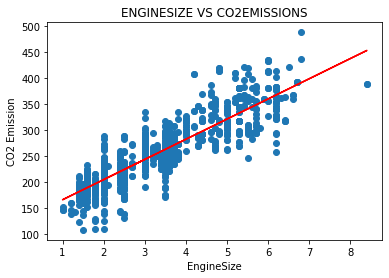

In [22]:
# plot the regression line for complete data

plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"])
plt.plot(data["ENGINESIZE"], predicted_data, color="red")
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("EngineSize")
plt.ylabel("CO2 Emission")
plt.show()


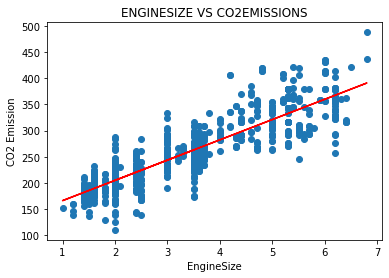

In [23]:
# plot the regression line for training data

plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"])
plt.plot(train["ENGINESIZE"], predicted_train, color="red")
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("EngineSize")
plt.ylabel("CO2 Emission")
plt.show()


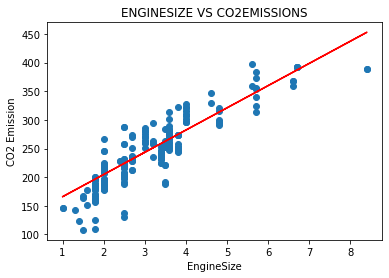

In [25]:
# plot the regression line for testing data

plt.scatter(test["ENGINESIZE"],test["CO2EMISSIONS"])
plt.plot(test["ENGINESIZE"], predicted_test, color="red")
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("EngineSize")
plt.ylabel("CO2 Emission")
plt.show()

# 13. Create dataframe for actual and predicted data points

In [26]:
# Create a dataframe for Actual and Predoicted values

A_P_data = pd.DataFrame({"Actual": data["CO2EMISSIONS"],
                        "Predicted": predicted_data[:][0][0]})
A_P_data.head()

,Actual,Predicted
0,196,204.760147
1,221,204.760147
2,136,204.760147
3,255,204.760147
4,244,204.760147


# 14. Plotting the bar graph for actual and predicted values

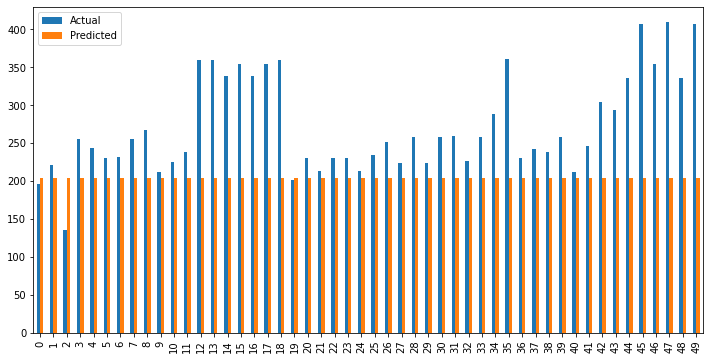

In [31]:
# compare for the 50 first samples

A_P_data.head(50).plot(kind='bar', figsize=(12,6))
plt.show()

# 15. Calculating error in prediction

In [34]:
# Error calculation

test_x = np.array(test[["ENGINESIZE"]])
test_y = np.array(test[["CO2EMISSIONS"]])

predicted_y = regr.predict(test_x)

res = (predicted_y - test_y)
RSS = (res*res).sum()

print("Residual Sum of Squares : ", RSS)

Residual Sum of Squares :  159741.10295932175


Here we can see that we got the same output even if we use the Scikit-learn library.  
Therefore we can be sure that all the calculations we performed and derivations we understood are precisely accurate.  
Please note that there are other methods to calculate the prediction error, and we will try to cover them in our future tutorials.